In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble

smoking = pd.read_csv('./smoking_purged.csv')
smoking.head(10)



,gender,age,bmi,waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,0.387097,81.3,114,73,94,215,82,73,126,12.9,1,0.7,18,19,27,0,1,0
1,0,40,0.375000,81.0,119,70,130,192,115,42,127,12.7,1,0.6,22,19,18,0,1,0
2,1,55,0.352941,80.0,138,86,89,242,182,55,151,15.8,1,1.0,21,16,22,0,0,1
3,1,40,0.424242,88.0,100,60,96,322,254,45,226,14.7,1,1.0,19,26,18,0,1,0
4,0,40,0.387097,86.0,120,74,80,184,74,62,107,12.5,1,0.6,16,14,22,0,0,0
5,1,30,0.416667,85.0,128,76,95,217,199,48,129,16.2,1,1.2,18,27,33,0,1,0
6,1,40,0.375000,85.5,116,82,94,226,68,55,157,17.0,1,0.7,21,27,39,1,1,1
7,1,45,0.545455,96.0,153,96,158,222,269,34,134,15.0,1,1.3,38,71,111,0,1,0
8,0,50,0.400000,85.0,115,74,86,210,66,48,149,13.7,1,0.8,31,31,14,0,0,0
9,1,45,0.428571,89.0,113,64,94,198,147,43,126,16.0,1,0.8,26,24,63,0,0,0


In [37]:
import numpy as np

def preprocess_data(df):
    numeric_df = df.select_dtypes(include=[np.number])
    numeric_df = numeric_df.fillna(numeric_df.mean())
    return numeric_df

In [15]:
print(smoking.describe())
print(smoking.info())

             gender           age           bmi     waist(cm)      systolic  \
count  55692.000000  55692.000000  55692.000000  55692.000000  55692.000000   
mean       0.635657     44.182917      0.398335     82.046418    121.494218   
std        0.481250     12.071418      0.064434      9.274223     13.675989   
min        0.000000     20.000000      0.206897     51.000000     71.000000   
25%        0.000000     40.000000      0.352941     76.000000    112.000000   
50%        1.000000     40.000000      0.393939     82.000000    120.000000   
75%        1.000000     55.000000      0.441176     88.000000    130.000000   
max        1.000000     85.000000      0.750000    129.000000    240.000000   

         relaxation  fasting blood sugar   Cholesterol  triglyceride  \
count  55692.000000         55692.000000  55692.000000  55692.000000   
mean      76.004830            99.312325    196.901422    126.665697   
std        9.679278            20.795591     36.297940     71.639817   


<Axes: >

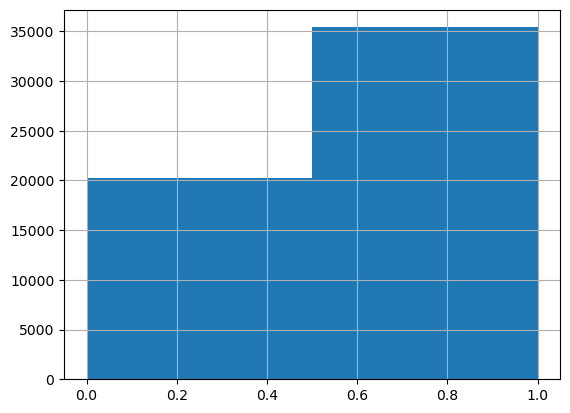

In [16]:
smoking['gender'].hist(bins=2)

<Axes: >

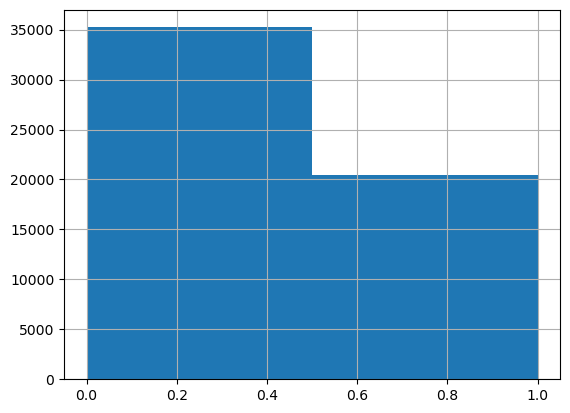

In [17]:
smoking['smoking'].hist(bins=2)

<Axes: >

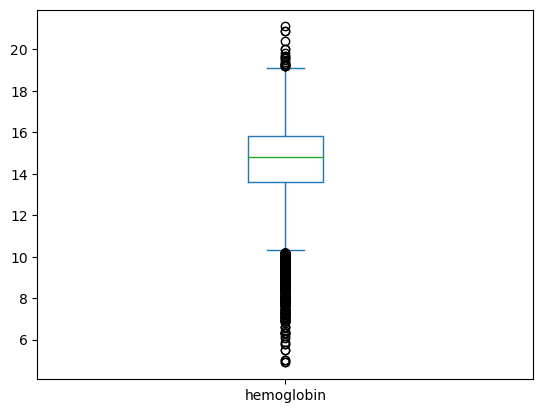

In [18]:
smoking['hemoglobin'].plot.box() 

<Axes: >

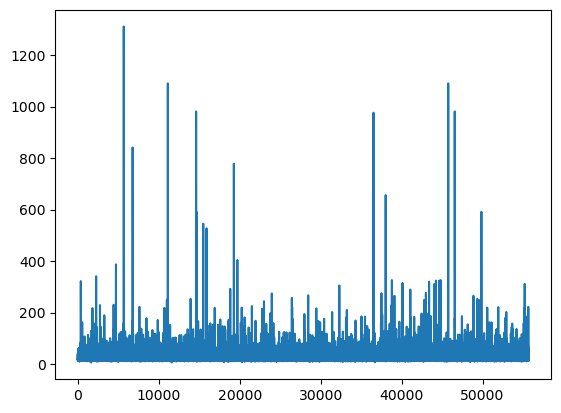

In [19]:
smoking['AST'].plot()

<Axes: ylabel='Density'>

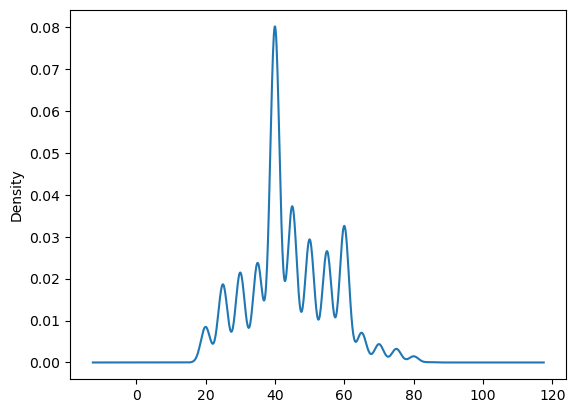

In [20]:
smoking['age'].plot.kde()

<Axes: xlabel='AST', ylabel='ALT'>

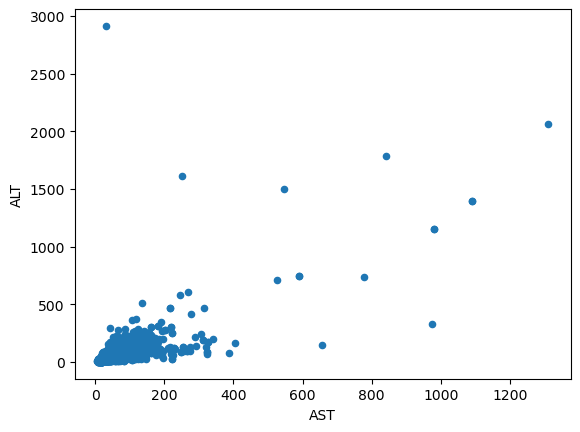

In [21]:
smoking.plot.scatter(x='AST', y='ALT')

array([[<Axes: xlabel='systolic', ylabel='systolic'>,
        <Axes: xlabel='hemoglobin', ylabel='systolic'>,
        <Axes: xlabel='AST', ylabel='systolic'>,
        <Axes: xlabel='ALT', ylabel='systolic'>,
        <Axes: xlabel='Gtp', ylabel='systolic'>],
       [<Axes: xlabel='systolic', ylabel='hemoglobin'>,
        <Axes: xlabel='hemoglobin', ylabel='hemoglobin'>,
        <Axes: xlabel='AST', ylabel='hemoglobin'>,
        <Axes: xlabel='ALT', ylabel='hemoglobin'>,
        <Axes: xlabel='Gtp', ylabel='hemoglobin'>],
       [<Axes: xlabel='systolic', ylabel='AST'>,
        <Axes: xlabel='hemoglobin', ylabel='AST'>,
        <Axes: xlabel='AST', ylabel='AST'>,
        <Axes: xlabel='ALT', ylabel='AST'>,
        <Axes: xlabel='Gtp', ylabel='AST'>],
       [<Axes: xlabel='systolic', ylabel='ALT'>,
        <Axes: xlabel='hemoglobin', ylabel='ALT'>,
        <Axes: xlabel='AST', ylabel='ALT'>,
        <Axes: xlabel='ALT', ylabel='ALT'>,
        <Axes: xlabel='Gtp', ylabel='ALT'>],
       [

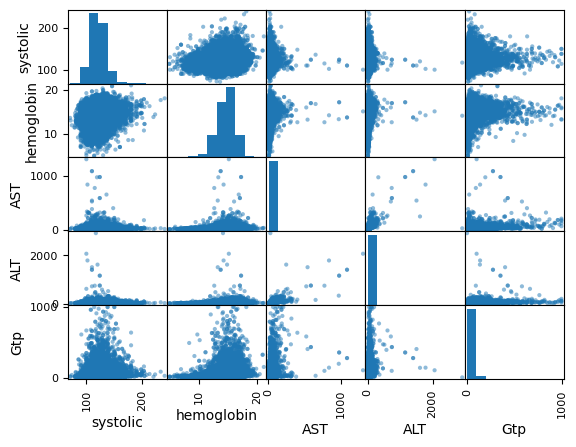

In [22]:
pd.plotting.scatter_matrix(smoking[['systolic', 'hemoglobin', 'AST', 'ALT', 'Gtp']])

In [23]:
#Macierz korelacji
corr_matrix = smoking.corr() 
corr_matrix['smoking'].sort_values(ascending=False)

smoking                1.000000
gender                 0.510340
hemoglobin             0.400678
triglyceride           0.251799
Gtp                    0.236619
bmi                    0.231693
waist(cm)              0.226259
serum creatinine       0.216812
relaxation             0.108309
dental caries          0.103857
fasting blood sugar    0.100279
tartar                 0.098655
ALT                    0.097338
systolic               0.073109
AST                    0.059253
Urine protein          0.014267
Cholesterol           -0.028548
LDL                   -0.045220
age                   -0.162557
HDL                   -0.178470
Name: smoking, dtype: float64

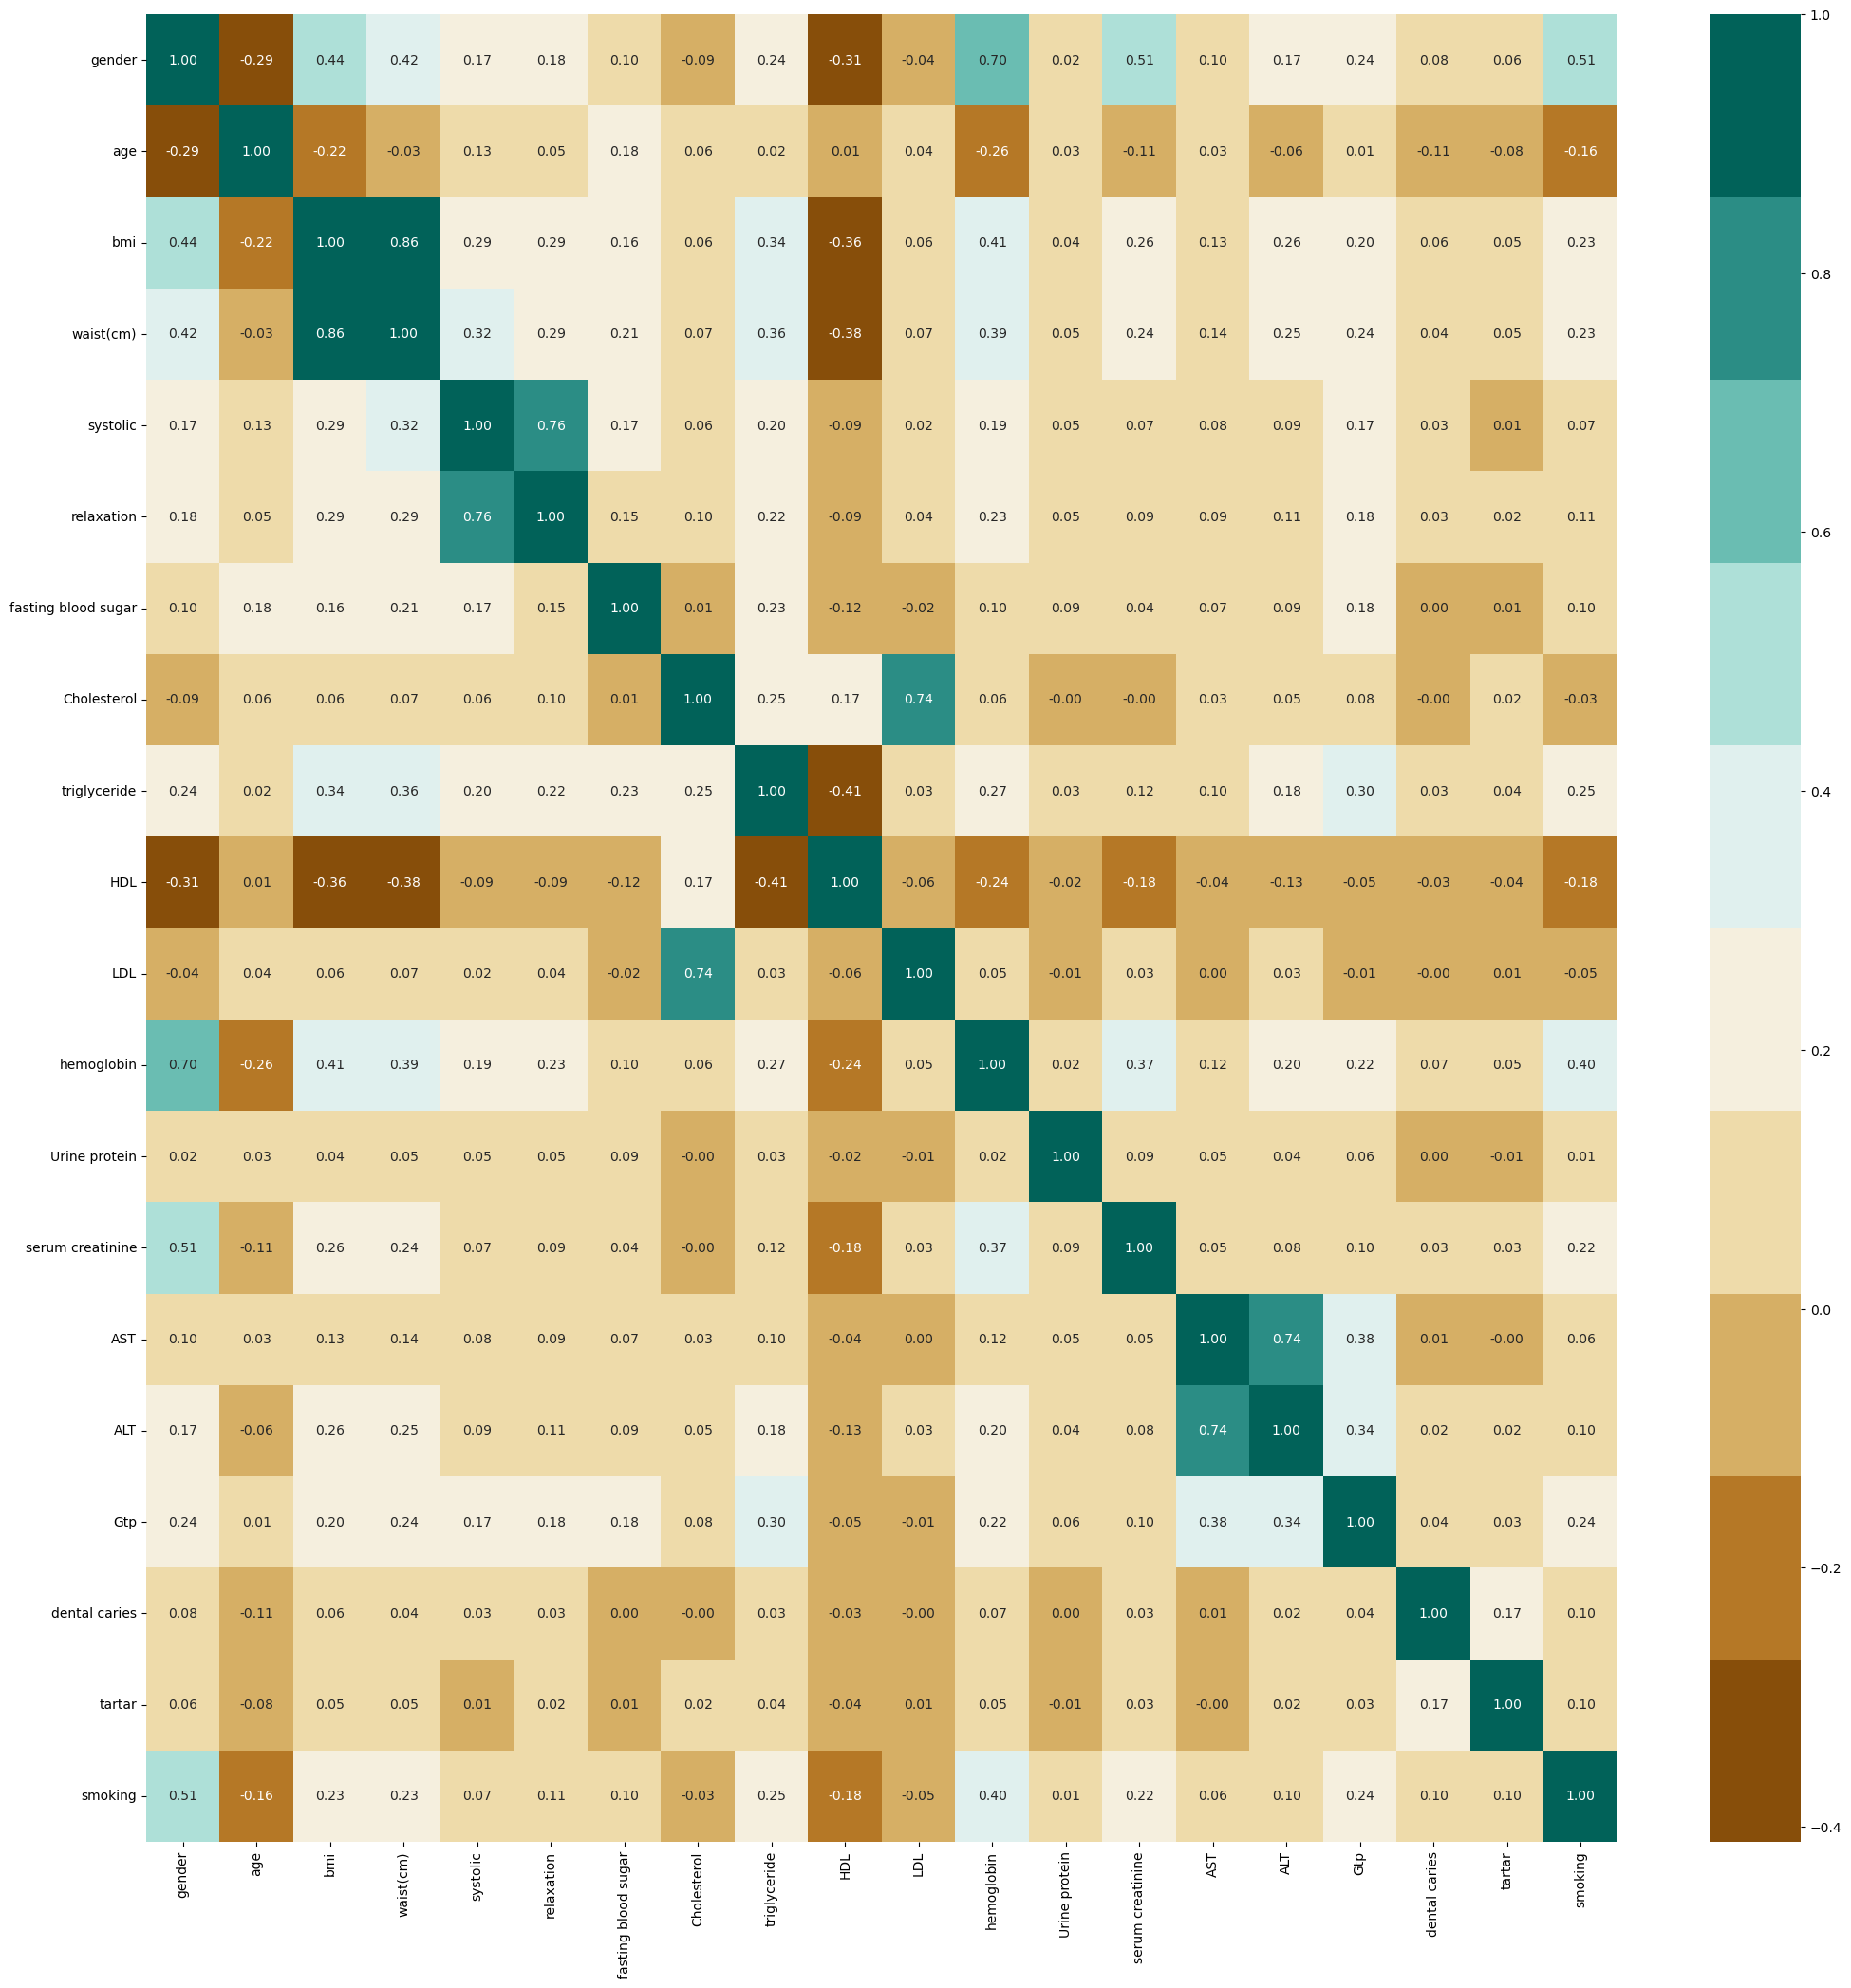

In [24]:
#Heat Map macierzy korelacji
correlations = smoking.corr()
fig, ax = plt.subplots(figsize=(25, 25))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
#ax.set_yticklabels(column_names);
plt.show()

In [25]:
X = smoking.drop('smoking', axis=1).to_numpy()
X

array([[ 0.        , 40.        ,  0.38709677, ..., 27.        ,
         0.        ,  1.        ],
       [ 0.        , 40.        ,  0.375     , ..., 18.        ,
         0.        ,  1.        ],
       [ 1.        , 55.        ,  0.35294118, ..., 22.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , 55.        ,  0.3125    , ..., 12.        ,
         0.        ,  0.        ],
       [ 1.        , 60.        ,  0.36363636, ..., 18.        ,
         0.        ,  0.        ],
       [ 1.        , 55.        ,  0.40625   , ..., 41.        ,
         0.        ,  1.        ]])

In [26]:
y = smoking.loc[:, 'smoking'].to_numpy()
y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 
X_train

array([[  1.        ,  45.        ,   0.33333333, ...,  20.        ,
          1.        ,   0.        ],
       [  1.        ,  40.        ,   0.45714286, ...,  14.        ,
          0.        ,   1.        ],
       [  0.        ,  50.        ,   0.38709677, ...,  27.        ,
          0.        ,   0.        ],
       ...,
       [  1.        ,  55.        ,   0.34375   , ..., 238.        ,
          0.        ,   0.        ],
       [  1.        ,  35.        ,   0.44117647, ...,  20.        ,
          0.        ,   0.        ],
       [  0.        ,  40.        ,   0.38709677, ...,  17.        ,
          0.        ,   1.        ]])

In [48]:
# universal method for training and evaluation of models

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # train model
    classifier.fit(feature_vector_train, label)
    
    # generate labels for validation set
    predictions = classifier.predict(feature_vector_valid)
    
    # evealuate model based on test set labels
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [49]:
accuracy = train_model(linear_model.LogisticRegression(max_iter=4000), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.7801915106474203, 0.8155064236629818, 0.7974581842086043, 0.7510548523206751]


In [50]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.8815206517078749, 0.7212347988774556, 0.7933629172294039, 0.711553999461352]


In [51]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.8645133628698013, 0.871613832853026, 0.8680490779938294, 0.8349043899811474]


In [52]:
# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.7840503072745463, 0.8252105896510229, 0.8041040674239648, 0.7600323188796122]


In [46]:
# compare models

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

ValueError: Length of values (0) does not match length of index (4)

In [43]:
class TestPreprocessData(unittest.TestCase):
    def setUp(self):
        self.sample_data = {
            'gender': [0, 1],
            'age': [20, 85],
            'bmi': [0.2, 0.75],
            'waist(cm)': [50, 130],
            'systolic': [71, 240],
            'relaxation': [60, 80],\
            'fasting blood sugar': [90, 120],
            'Cholesterol': [180, 220],
            'triglyceride': [100, 150],
            'HDL': [50, 60],
            'LDL': [100, 120],
            'hemoglobin': [14.0, 15.5],
            'Urine protein': [1, 2],
            'serum creatinine': [0.9, 1.1],
            'AST': [20, 25],
            'ALT': [30, 35],
            'Gtp': [40, 45],
            'dental caries': [0, 1],
            'tartar': [0, 1],
            'smoking': [0, 1]
        }
        self.df = pd.DataFrame(self.sample_data)

    def test_is_numeric(self):
        numeric_df = preprocess_data(self.df.copy())
        
        self.assertTrue(all(np.issubdtype(dtype, np.number) for dtype in numeric_df.dtypes), "Not all columns are numeric.")

    def test_column_names(self):
        numeric_df = preprocess_data(self.df.copy())
        expected_columns = ['gender', 'age', 'bmi', 'waist(cm)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar', 'smoking']
        self.assertListEqual(list(numeric_df.columns), expected_columns, "Column names are not as expected.")

    def test_missing_values(self):
        self.df.loc[0, 'bmi'] = np.nan  # Introduce a missing value
        numeric_df = preprocess_data(self.df.copy())
        
        self.assertFalse(numeric_df.isnull().values.any(), "Missing values not handled properly.")
        
    def test_values_in_range(self):
        numeric_df = preprocess_data(self.df.copy())
        ranges = {
            'age': (20, 85),
            'bmi': (0.2, 0.75),
            'waist(cm)': (50, 130),
            'systolic': (71, 240),
            'relaxation': (60, 146),
            'fasting blood sugar': (46, 505),
            'Cholesterol': (55, 445),
            'triglyceride': (8, 999),
            'HDL': (4, 618),
            'LDL': (1, 1860),
            'hemoglobin': (4.9, 21.1),
            'Urine protein': (1, 6),
            'serum creatinine': (0.1, 11.6),
            'AST': (6, 1311),
            'ALT': (1, 2914),
            'Gtp': (1, 999),
            'dental caries': (0, 1),
            'tartar': (0, 1),
            'smoking': (0, 1)
        }
        for column, (min_val, max_val) in ranges.items():
            self.assertTrue(((numeric_df[column] >= min_val) & (numeric_df[column] <= max_val)).all(), f"Values in {column} column are not within range {min_val}-{max_val}")

def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestPreprocessData)
    unittest.TextTestRunner(verbosity=2).run(suite)
    
run_tests()

test_column_names (__main__.TestPreprocessData.test_column_names) ... ok
test_is_numeric (__main__.TestPreprocessData.test_is_numeric) ... ok
test_missing_values (__main__.TestPreprocessData.test_missing_values) ... ok
test_values_in_range (__main__.TestPreprocessData.test_values_in_range) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.135s

OK
